In [1]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import re
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_json('Automotive_5.json', lines=True)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B00002243X,"[4, 4]",5,I needed a set of jumper cables for my new car and these had good reviews and were at a good price. They have been used a few times already and do what they are supposed to - no complaints there....,"08 17, 2011",A3F73SC1LY51OO,Alan Montgomery,Work Well - Should Have Bought Longer Ones,1313539200
1,B00002243X,"[1, 1]",4,"These long cables work fine for my truck, but the quality seems a little on the shabby side. For the money I was not expecting 200 dollar snap-on jumper cables but these seem more like what you wo...","09 4, 2011",A20S66SKYXULG2,alphonse,Okay long cables,1315094400
2,B00002243X,"[0, 0]",5,"Can't comment much on these since they have not yet been used (I will come back and update my review is I find any issues after first use) ... but they are built solid, nice tough big hard clamps ...","07 25, 2013",A2I8LFSN2IS5EO,Chris,Looks and feels heavy Duty,1374710400
3,B00002243X,"[19, 19]",5,"I absolutley love Amazon!!! For the price of a set of cheap Booster/Jumper Cables in a brick and morter store, you can buy extra long and heavy duty jumpers! First off, don't be the person that ...","12 21, 2010",A3GT2EWQSO45ZG,DeusEx,Excellent choice for Jumper Cables!!!,1292889600
4,B00002243X,"[0, 0]",5,"I purchased the 12' feet long cable set and they arrived in a retail cardboard box with handle, which could be used as a storage and carrying case for these cables, although I will not need to sto...","07 4, 2012",A3ESWJPAVRPWB4,E. Hernandez,"Excellent, High Quality Starter Cables",1341360000


In [4]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

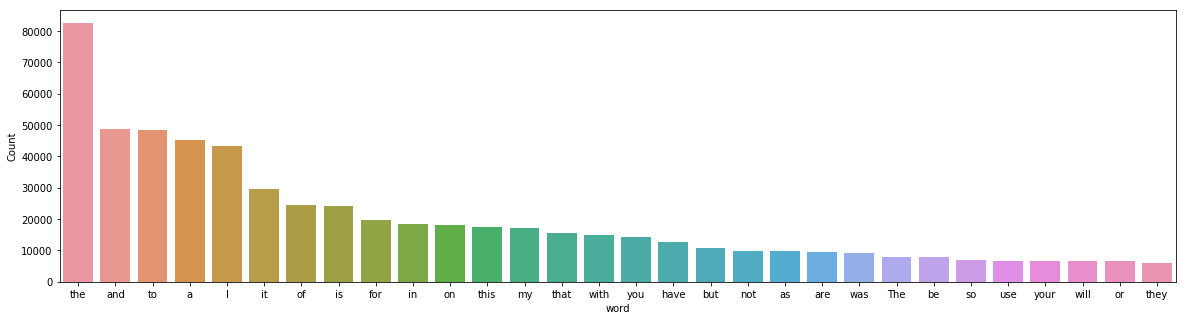

In [5]:
freq_words(df['reviewText'])

In [6]:
df['reviewText'] = df['reviewText'].str.replace("[^a-zA-Z#]", " ")


In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [8]:
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['reviewText']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

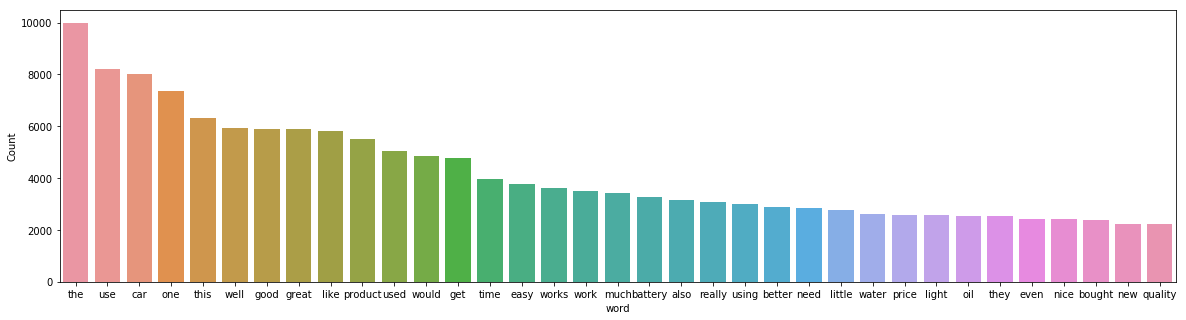

In [9]:
freq_words(reviews, 35)

In [10]:
!pip install spaCy

     |████████████████████████████████| 30.9MB 237kB/s  eta 0:00:01███████████▌               | 15.9MB 3.0MB/s eta 0:00:06     |████████████████████▊           | 20.0MB 18.7MB/s eta 0:00:01MB 18.7MB/s eta 0:00:01
     |████████████████████████████████| 184kB 29.2MB/s eta 0:00:01
     |████████████████████████████████| 2.1MB 25.9MB/s eta 0:00:01
     |████████████████████████████████| 92kB 12.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/9e/9b/62c60d2f5bc135d2aa1d8c8a86aaf84edb719a59c7f11a4316259e61a298/plac-0.9.6-py2.py3-none-any.whl
     |████████████████████████████████| 3.2MB 10.9MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
import spacy

In [12]:
!python -m spacy download en # one time run

     |████████████████████████████████| 11.1MB 3.4MB/s eta 0:00:01
  Stored in directory: /tmp/pip-ephem-wheel-cache-879brxnq/wheels/39/ea/3b/507f7df78be8631a7a3d7090962194cf55bc1158572c0be77f
Successfully built en-core-web-sm
You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/en_core_web_sm -->
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [13]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [14]:
def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [15]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())


In [16]:
print(tokenized_reviews[1])

['these', 'long', 'cables', 'work', 'fine', 'truck', 'quality', 'seems', 'little', 'shabby', 'side', 'for', 'money', 'expecting', 'dollar', 'snap', 'jumper', 'cables', 'seem', 'like', 'would', 'see', 'chinese', 'knock', 'shop', 'like', 'harbor', 'freight', 'bucks']


In [17]:
reviews_2 = lemmatization(tokenized_reviews)


In [18]:
print(reviews_2[1]) # print lemmatized review

['long', 'cable', 'fine', 'truck', 'quality', 'little', 'shabby', 'side', 'money', 'dollar', 'snap', 'jumper', 'cable', 'chinese', 'shop', 'harbor', 'freight', 'buck']


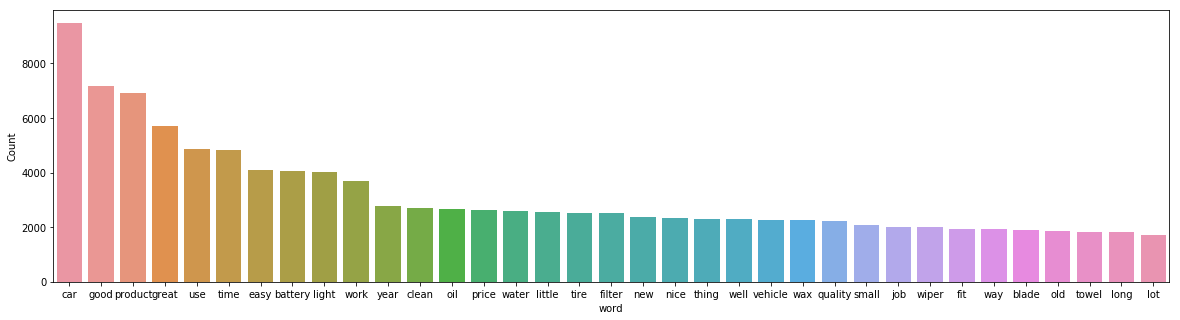

In [19]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 35)

In [20]:
dictionary = corpora.Dictionary(reviews_2)


In [21]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]


In [22]:
LDA = gensim.models.ldamodel.LdaModel


In [42]:
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=8, random_state=100,
                chunksize=1000, passes=50)

In [43]:
lda_model.print_topics()

[(0,
  '0.048*"oil" + 0.035*"filter" + 0.024*"engine" + 0.022*"change" + 0.019*"car" + 0.013*"mile" + 0.012*"gas" + 0.012*"automatic" + 0.012*"fuel" + 0.011*"fluid"'),
 (1,
  '0.040*"good" + 0.026*"price" + 0.025*"product" + 0.025*"quality" + 0.020*"great" + 0.012*"work" + 0.012*"cheap" + 0.011*"use" + 0.010*"amazon" + 0.010*"time"'),
 (2,
  '0.046*"battery" + 0.028*"car" + 0.024*"power" + 0.017*"light" + 0.017*"device" + 0.015*"unit" + 0.013*"charger" + 0.012*"phone" + 0.011*"charge" + 0.011*"use"'),
 (3,
  '0.085*"light" + 0.039*"bulb" + 0.028*"bright" + 0.016*"install" + 0.016*"great" + 0.015*"white" + 0.014*"jeep" + 0.013*"easy" + 0.012*"color" + 0.011*"bosch"'),
 (4,
  '0.025*"wiper" + 0.025*"blade" + 0.024*"tire" + 0.016*"hose" + 0.012*"car" + 0.011*"pressure" + 0.010*"windshield" + 0.010*"time" + 0.009*"gauge" + 0.009*"code"'),
 (5,
  '0.037*"car" + 0.030*"towel" + 0.023*"clean" + 0.021*"water" + 0.018*"leather" + 0.015*"product" + 0.013*"use" + 0.012*"wash" + 0.012*"good" + 0.0

In [25]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 3.5MB/s eta 0:00:01
  Stored in directory: /home/nbuser/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis
You should consider upgrading via the 'pip install --upgrade pip' command.


In [45]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.211664  0.158896       1        1  15.472813
5     -0.076224 -0.141042       2        1  14.963673
4     -0.043294  0.037120       3        1  14.938509
1     -0.081561 -0.015657       4        1  14.888789
2     -0.032935  0.029742       5        1  12.083910
6      0.024634 -0.156556       6        1  11.690701
0      0.185046 -0.145197       7        1   8.234293
3      0.236000  0.232695       8        1   7.727303, topic_info=     Category         Freq         Term        Total  loglift  logprob
term                                                                  
150   Default  4769.000000        light  4769.000000  30.0000  30.0000
38    Default  3070.000000      battery  3070.000000  29.0000  29.0000
3     Default  9548.000000          car  9548.000000  28.0000  28.0000
168   Default  2155.000000          oil  2155.000000  27.0000  27.0000
314   Default  6696.000000      product  6696.000000  26.0000  26.0000
527   Default  2488.000000        towel  2488.000000  25.0000  25.0000
523   Default  2158.000000          wax  2158.000000  24.0000  24.0000
2595  Default  1669.000000         bulb  1669.000000  23.0000  23.0000
975   Default  1589.000000       filter  1589.000000  22.0000  22.0000
936   Default  2088.000000        wiper  2088.000000  21.0000  21.0000
963   Default  2082.000000        blade  2082.000000  20.0000  20.0000
30    Default  2105.000000      quality  2105.000000  19.0000  19.0000
333   Default  1987.000000         tire  1987.000000  18.0000  18.0000
63    Default  1564.000000        power  1564.000000  17.0000  17.0000
18    Default  2448.000000        price  2448.000000  16.0000  16.0000
522   Default  2470.000000        water  2470.000000  15.0000  15.0000
1281  Default  1180.000000       bright  1180.000000  14.0000  14.0000
95    Default  2363.000000        clean  2363.000000  13.0000  13.0000
1324  Default  1454.000000      leather  1454.000000  12.0000  12.0000
118   Default  1269.000000       engine  1269.000000  11.0000  11.0000
646   Default  1300.000000        paint  1300.000000  10.0000  10.0000
1086  Default  1011.000000       change  1011.000000   9.0000   9.0000
726   Default  1327.000000         hose  1327.000000   8.0000   8.0000
8     Default  6687.000000         good  6687.000000   7.0000   7.0000
759   Default  1188.000000       device  1188.000000   6.0000   6.0000
472   Default  1151.000000      install  1151.000000   5.0000   5.0000
708   Default   955.000000          pad   955.000000   4.0000   4.0000
1199  Default   883.000000      charger   883.000000   3.0000   3.0000
110   Default   975.000000          dry   975.000000   2.0000   2.0000
526   Default   974.000000   microfiber   974.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
2800   Topic8    85.673523        dodge    86.442429   2.5515  -6.2039
2293   Topic8    83.051773      fixture    83.820229   2.5512  -6.2350
2283   Topic8    79.654266        relay    80.422615   2.5508  -6.2767
2594   Topic8    80.349365       sander    81.124557   2.5508  -6.2681
308    Topic8   380.760345        night   417.238525   2.4689  -4.7123
150    Topic8  3618.919922        light  4769.393555   2.2844  -2.4605
1654   Topic8   361.401306        stock   429.896118   2.3869  -4.7645
601    Topic8   655.223572        white   877.510925   2.2683  -4.1695
2961   Topic8   332.764404    headlight   436.633820   2.2888  -4.8470
472    Topic8   658.951172      install  1151.284912   2.0024  -4.1638
1173   Topic8   280.412384      factory   391.265503   2.2273  -5.0182
1512   Topic8   525.898499        color   983.252319   1.9347  -4.3893
2035   Topic8   174.157532        video   227.215897   2.2945  -5.4945
1515   Topic8   205.859482       yellow   298.164764   2.1900  -5.3273
1247   Topic8   269.413055  replacement   472.793793   1.9980  -5.0582
1670   To

In [46]:
print("\nPerplexity",lda_model.log_perplexity(doc_term_matrix))


Perplexity -7.447852770365015


In [47]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model,texts=reviews_2,dictionary=dictionary,coherence='c_v')

In [48]:
coherence_lda=coherence_model_lda.get_coherence()
print("\nCoherence:",coherence_lda)


Coherence: 0.49702570573234806


In [53]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LDA(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

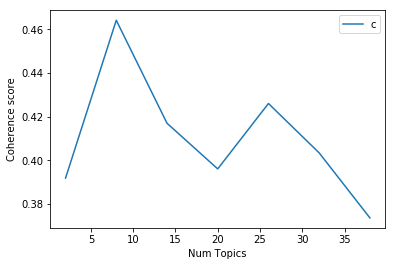

In [54]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=reviews_2, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()